In [87]:
import numpy as np
import os
import pandas as pd
import torch
import albumentations as A
import albumentations.pytorch
import cv2
import sys
import random
import csv
import json
import matplotlib.pyplot as plt

sys.path.append('../')
%matplotlib inline

# from visualize import visualize

In [88]:
df = pd.read_csv('../data/df.csv')
df.shape

(1555, 12)

In [89]:
df.columns

Index(['index', 'label', 'bbox', 'xmin', 'ymin', 'w', 'h', 'occluded',
       'description', 'cell_type', 'iscrowd', 'path'],
      dtype='object')

In [5]:
df.label.value_counts()

ASC-US                       645
AS                           254
LSIL                         232
ASC-US with HPV infection    127
HS                           105
LSIL with HPV infection       81
LS                            41
ASC-H                         24
AH                            21
C                             18
Negative                       3
ASCUS-SIL                      2
HSIL                           2
Name: label, dtype: int64

In [6]:
df[df['label'] == 'AS'].w.describe()

count    254.000000
mean     151.039370
std       55.503289
min       57.000000
25%      110.250000
50%      147.000000
75%      185.000000
max      384.000000
Name: w, dtype: float64

In [7]:
df[df['label'] == 'ASC-US'].w.describe()

count    645.000000
mean     158.344186
std       74.477367
min       55.000000
25%      112.000000
50%      142.000000
75%      179.000000
max      646.000000
Name: w, dtype: float64

In [8]:
df[df['label'] == 'LSIL'].w.describe()

count    232.000000
mean     209.620690
std       89.242377
min       12.000000
25%      145.000000
50%      192.000000
75%      261.000000
max      696.000000
Name: w, dtype: float64

In [9]:
df[df['label'] == 'LSIL with HPV infection'].w.describe()


count     81.000000
mean     197.320988
std       47.039831
min       97.000000
25%      158.000000
50%      205.000000
75%      229.000000
max      292.000000
Name: w, dtype: float64

In [10]:
df[df['label'] == 'ASC-US with HPV infection'].w.describe()

count    127.000000
mean     148.204724
std       38.955477
min        5.000000
25%      124.000000
50%      142.000000
75%      172.500000
max      277.000000
Name: w, dtype: float64

In [11]:
df[df['label'] == 'ASC-US'].w.describe()

count    645.000000
mean     158.344186
std       74.477367
min       55.000000
25%      112.000000
50%      142.000000
75%      179.000000
max      646.000000
Name: w, dtype: float64

In [14]:
# path_ascus = df[df['label'] == 'ASC-US'].path.values

In [15]:
df['label_id'] = df.label.apply( lambda x : 0.)
df_data = df.groupby('path')
def get_data(img_id):
    if img_id not in df_data.groups:
        return dict(image_id=img_id, source='', boxes=list())
    
    data  = df_data.get_group(img_id)
#     boxes = data['bbox'].values
    boxes = data[['xmin', 'ymin', 'w', 'h', 'label_id']].values
#     labels = data['label'].values
    return dict(image_id = img_id, boxes = boxes)
#     return dict(image_id = img_id, boxes = boxes, labels=labels)

image_list = [get_data(img_id) for img_id in df.path.unique()]
# df.head()
image_list[0]

{'image_id': 'patch_images/2021.01.08/LBC141-20210105(1)/LBC141-20210105(1)_1001.png',
 'boxes': array([[1558., 1603.,   96.,   73.,    0.],
        [1452., 1263.,   82.,   94.,    0.]])}

In [16]:
ascus_list = [get_data(img_id) for img_id in df[df['label'] == 'ASC-US'].path.unique()]

In [19]:
ascus_list[0]

{'image_id': 'patch_images/2021.01.08/LBC141-20210105(1)/LBC141-20210105(1)_1001.png',
 'boxes': array([[1558., 1603.,   96.,   73.,    0.],
        [1452., 1263.,   82.,   94.,    0.]])}

In [46]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
#     print(bbox)
    x_min, y_min, w, h, _ = list(map(int, bbox))
    x_max = x_min + w
    y_max = y_min + h
#     print(bbox)
#     x_min, y_min, x_max, y_max = list(map(round, bbox))
#     print((int(x_min), int(y_min)), (int(x_max), int(y_max)))

    img = cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color=BOX_COLOR, thickness=thickness)
    return img
visualize
def visualize(image, bboxes):
    img = image.copy()
    print(img.shape)
#     img = image.clone().detach()
    for bbox in (bboxes):
#         print(bbox)
        img = visualize_bbox(img, bbox)
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(img)

In [32]:
abs_path = '/home/Dataset/scl/'
print(abs_path+ascus_list[0]['image_id'])

/home/Dataset/scl/patch_images/2021.01.08/LBC141-20210105(1)/LBC141-20210105(1)_1001.png


In [34]:
ascus_list[0]['boxes']

array([[1558., 1603.,   96.,   73.,    0.],
       [1452., 1263.,   82.,   94.,    0.]])

<class 'numpy.ndarray'>
(2048, 2048, 3)


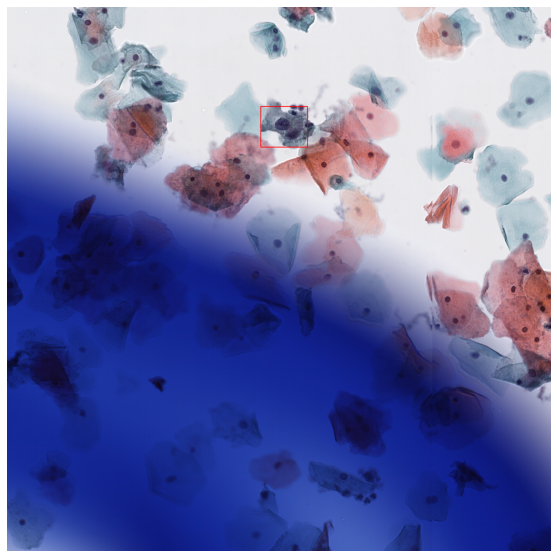

In [51]:
NUMBER = 80
img = cv2.imread(abs_path+ascus_list[NUMBER]['image_id'])
print(type(img))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape
visualize(img, ascus_list[NUMBER]['boxes'])

In [54]:
ascus_hpv_list = [get_data(img_id) for img_id in df[df['label'] == 'ASC-US with HPV infection'].path.unique()]
ascus_hpv_list[0]

{'image_id': 'patch_images/2021.01.11/LBC198-20210106(1)/LBC198-20210106(1)_1914.png',
 'boxes': array([[1784.,  428.,  104.,  104.,    0.]])}

<class 'numpy.ndarray'>
(2048, 2048, 3)


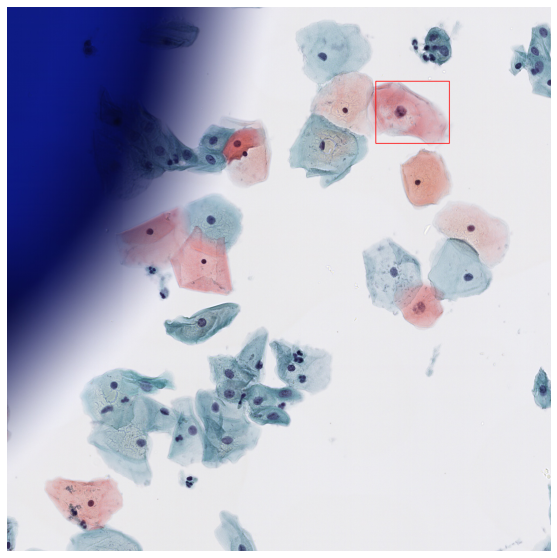

In [61]:
NUMBER = 30
img = cv2.imread(abs_path+ascus_hpv_list[NUMBER]['image_id'])
print(type(img))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape
visualize(img, ascus_hpv_list[NUMBER]['boxes'])

In [62]:
lsil_list = [get_data(img_id) for img_id in df[df['label'] == 'LSIL'].path.unique()]
lsil_list[0]

{'image_id': 'patch_images/2021.01.08/LBC141-20210105(1)/LBC141-20210105(1)_1025.png',
 'boxes': array([[672., 341., 227., 231.,   0.]])}

<class 'numpy.ndarray'>
(2048, 2048, 3)
[[638. 456. 134. 150.   0.]]


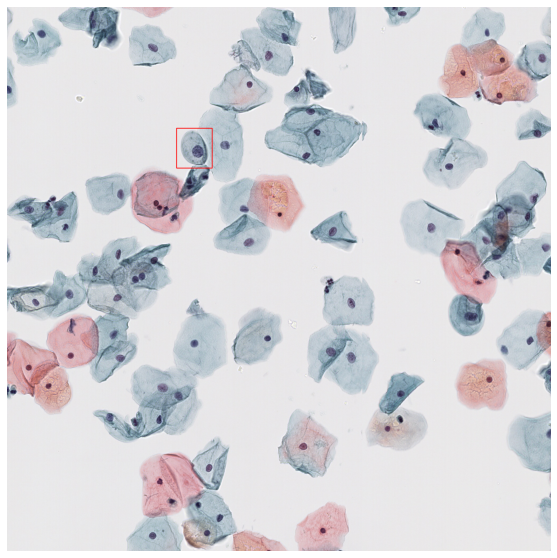

In [80]:
NUMBER = 41
img = cv2.imread(abs_path+lsil_list[NUMBER]['image_id'])
print(type(img))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape
visualize(img, lsil_list[NUMBER]['boxes'])
print(lsil_list[NUMBER]['boxes'])

In [81]:
df.label.value_counts()

ASC-US                       645
AS                           254
LSIL                         232
ASC-US with HPV infection    127
HS                           105
LSIL with HPV infection       81
LS                            41
ASC-H                         24
AH                            21
C                             18
Negative                       3
ASCUS-SIL                      2
HSIL                           2
Name: label, dtype: int64

count    645.000000
mean     158.344186
std       74.477367
min       55.000000
25%      112.000000
50%      142.000000
75%      179.000000
max      646.000000
Name: w, dtype: float64


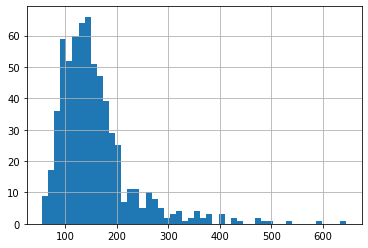

In [85]:
df[df['label'] == 'ASC-US'].w.hist(bins=50)
print(df[df['label'] == 'ASC-US'].w.describe())

count    232.000000
mean     209.620690
std       89.242377
min       12.000000
25%      145.000000
50%      192.000000
75%      261.000000
max      696.000000
Name: w, dtype: float64


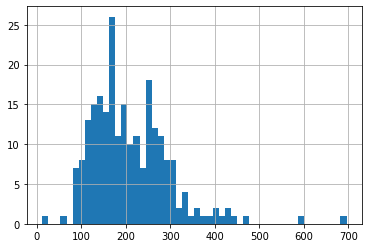

In [86]:
df[df['label'] == 'LSIL'].w.hist(bins=50)
print(df[df['label'] == 'LSIL'].w.describe())